In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
import seaborn as sns
df=pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.set_index("Name",inplace=True)

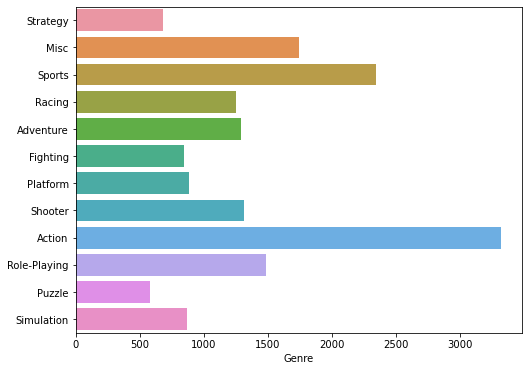

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
h=pd.value_counts(df['Genre'],sort=False)
sns.barplot(y=h.index,x=h)

The number of games by genre.

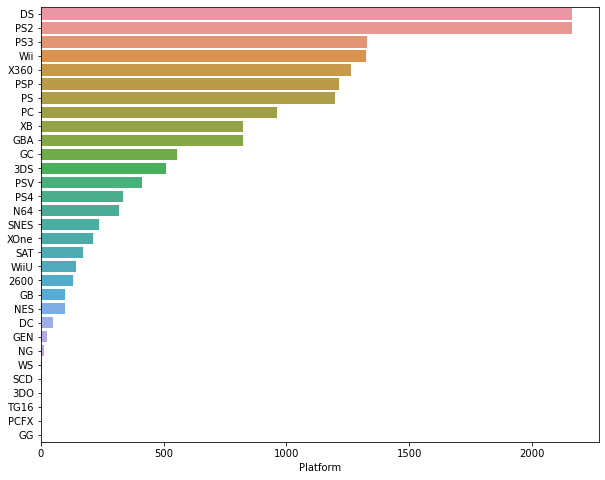

In [4]:
u=pd.value_counts(df['Platform'])
plt.figure(figsize=(10,8))
sns.barplot(y=u.index,x=u)

The number of games by platform

In [5]:
i=pd.value_counts(df['Year'],sort=False)
s=df.groupby("Year")['Global_Sales'].agg('sum')

In [6]:
year_sales=pd.merge(i,s,left_index=True,right_index=True)

In [7]:
year_sales.columns=['Number of games','Global_Sales']
year_sales.sort_index(inplace=True)

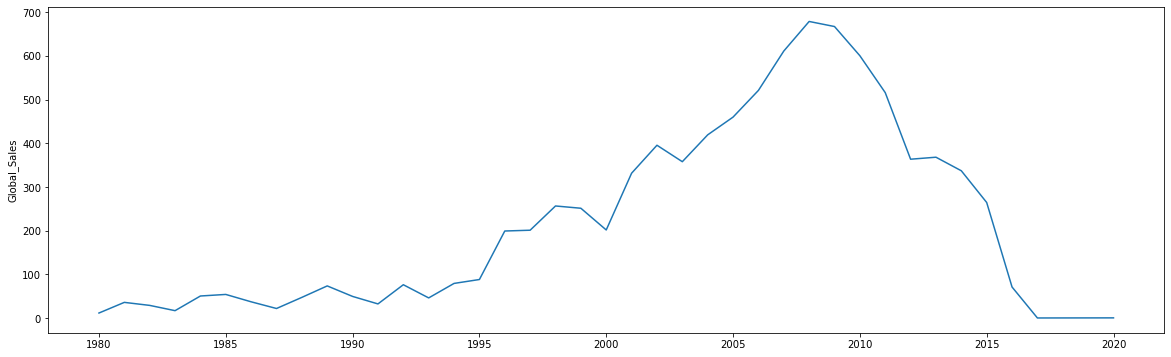

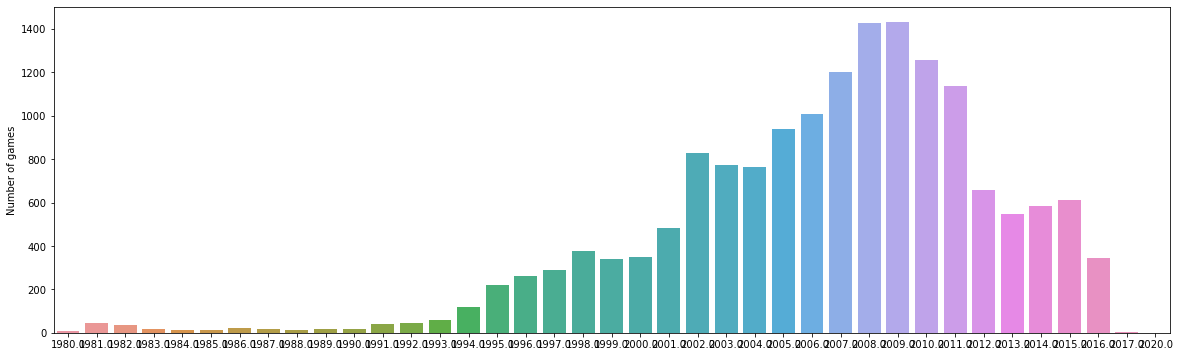

In [8]:
plt.figure(figsize=(20,6))
sns.lineplot(x=year_sales.index,y=year_sales['Global_Sales'])
plt.show()
plt.figure(figsize=(20,6))
sns.barplot(x=year_sales.index,y=year_sales['Number of games'])

Number of games launched and sales in millions by year.

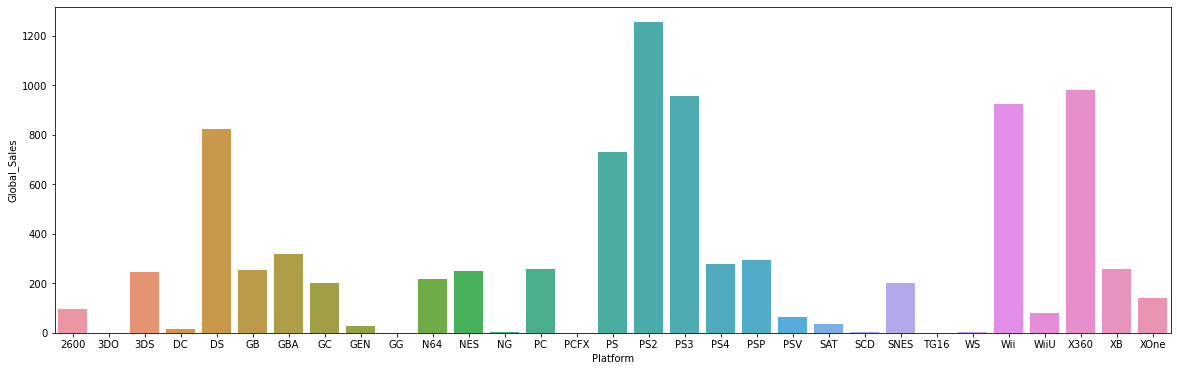

In [9]:
j=df.groupby('Platform')['Global_Sales'].agg('sum')
plt.figure(figsize=(20,6))
sns.barplot(x=j.index,y=j)

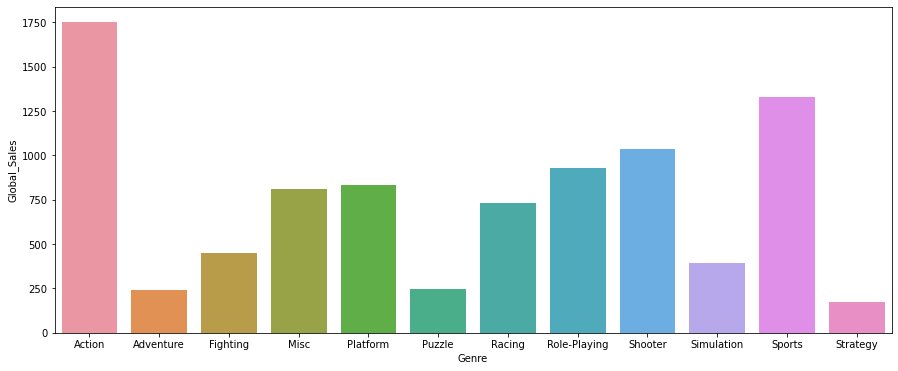

In [10]:
j=df.groupby('Genre')['Global_Sales'].agg('sum')
plt.figure(figsize=(15,6))
sns.barplot(x=j.index,y=j)

In [11]:
o=df.groupby(['Platform','Genre'])['Global_Sales'].agg("sum")
d=np.max(o.unstack(level=1),axis=0)

In [12]:
num=0
for genre in d.index:
    g=o.unstack(level=1)[o.unstack(level=1)[genre]==d[num]]
    print(g.index," ",genre)
    num+=1

Index(['PS3'], dtype='object', name='Platform')   Action
Index(['DS'], dtype='object', name='Platform')   Adventure
Index(['PS2'], dtype='object', name='Platform')   Fighting
Index(['Wii'], dtype='object', name='Platform')   Misc
Index(['NES'], dtype='object', name='Platform')   Platform
Index(['DS'], dtype='object', name='Platform')   Puzzle
Index(['PS2'], dtype='object', name='Platform')   Racing
Index(['DS'], dtype='object', name='Platform')   Role-Playing
Index(['X360'], dtype='object', name='Platform')   Shooter
Index(['DS'], dtype='object', name='Platform')   Simulation
Index(['Wii'], dtype='object', name='Platform')   Sports
Index(['PC'], dtype='object', name='Platform')   Strategy


**For a given genre of a game which platform earns the most.For example,for action games PS3 earns the most revenue.**

In [13]:
num=0
d=np.max(o.unstack(level=0),axis=0)
for genre in d.index:
    g=o.unstack(level=0)[o.unstack(level=0)[genre]==d[num]]
    print(g.index," ",genre)
    num+=1

Index(['Action'], dtype='object', name='Genre')   2600
Index(['Adventure'], dtype='object', name='Genre')   3DO
Index(['Role-Playing'], dtype='object', name='Genre')   3DS
Index(['Sports'], dtype='object', name='Genre')   DC
Index(['Misc'], dtype='object', name='Genre')   DS
Index(['Role-Playing'], dtype='object', name='Genre')   GB
Index(['Platform'], dtype='object', name='Genre')   GBA
Index(['Action'], dtype='object', name='Genre')   GC
Index(['Platform'], dtype='object', name='Genre')   GEN
Index(['Platform'], dtype='object', name='Genre')   GG
Index(['Racing'], dtype='object', name='Genre')   N64
Index(['Platform'], dtype='object', name='Genre')   NES
Index(['Fighting'], dtype='object', name='Genre')   NG
Index(['Simulation'], dtype='object', name='Genre')   PC
Index(['Role-Playing'], dtype='object', name='Genre')   PCFX
Index(['Action'], dtype='object', name='Genre')   PS
Index(['Sports'], dtype='object', name='Genre')   PS2
Index(['Action'], dtype='object', name='Genre')   PS3
I

**The type genre of game that earnt the most based on given platform.This could give us an idea of what the gamers prefer.For example if you have a PS2 we can see that sports games were sold the most**

In [14]:
h=df.groupby(['Publisher','Platform'])['Rank'].agg('count')

Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Platform,,,,,,,,,,,,,,,,,,,,,
2600,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DS,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DS,2.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,2.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
GB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


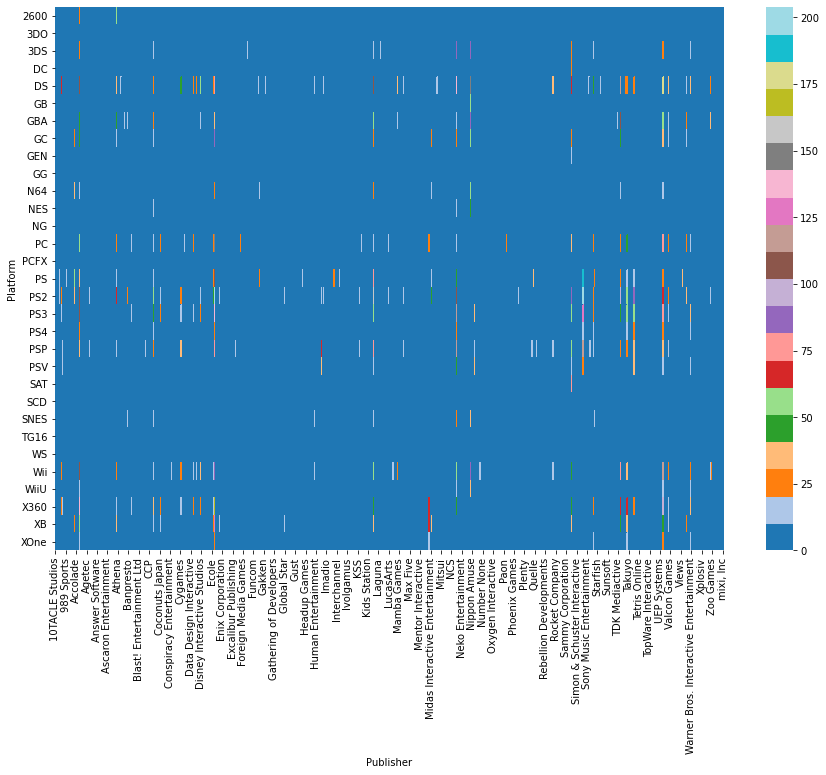

In [15]:
plt.figure(figsize=(15,10))
p=h.unstack(level=0).replace({np.nan:0})
sns.heatmap(p,cmap='tab20')
p

**Most publishers only make video games for a particular platform.**

In [16]:
pub=df.groupby("Publisher")['NA_Sales','JP_Sales','EU_Sales','Other_Sales','Global_Sales'].agg('sum')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
print('Publisher with max global sales',pub[pub['Global_Sales']==max(pub['Global_Sales'])].index)
print('Publisher with max sales in North America ',pub[pub['NA_Sales']==max(pub['NA_Sales'])].index)
print('Publisher with max sales in Japan ',pub[pub['JP_Sales']==max(pub['JP_Sales'])].index)
print('Publisher with max sales in the rest of the world ',pub[pub['Other_Sales']==max(pub['Other_Sales'])].index)
print('Publisher with max sales in Europe ',pub[pub['EU_Sales']==max(pub['EU_Sales'])].index)

Publisher with max global sales Index(['Nintendo'], dtype='object', name='Publisher')
Publisher with max sales in North America  Index(['Nintendo'], dtype='object', name='Publisher')
Publisher with max sales in Japan  Index(['Nintendo'], dtype='object', name='Publisher')
Publisher with max sales in the rest of the world  Index(['Electronic Arts'], dtype='object', name='Publisher')
Publisher with max sales in Europe  Index(['Nintendo'], dtype='object', name='Publisher')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


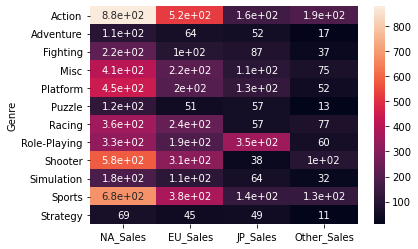

In [18]:
sns.heatmap(df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].agg('sum'),annot=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


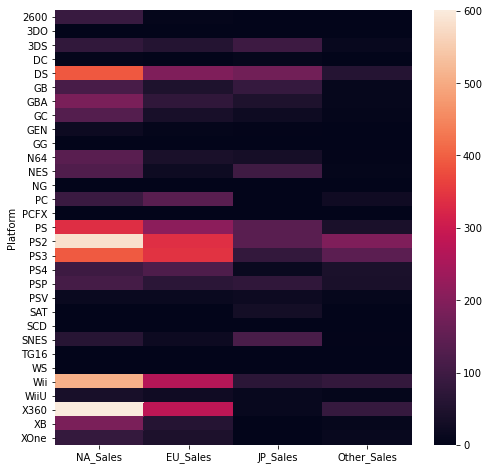

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.groupby('Platform')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].agg('sum'))

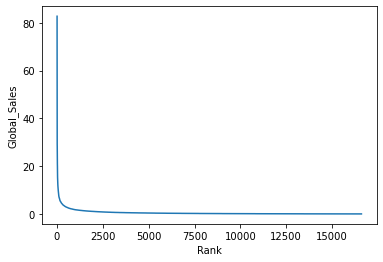

In [20]:
sns.lineplot(x=df['Rank'],y=df['Global_Sales'])